In [23]:
import requests

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../data/202405-citibike-tripdata/202405-citibike-tripdata_1.csv')

/var/folders/st/m0b_93g97bxcmqnsx5v2qdm00000gn/T/ipykernel_6967/4292729557.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/202405-citibike-tripdata/202405-citibike-tripdata_1.csv')


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,FE6A074FC945A086,electric_bike,2024-05-01 08:05:53,2024-05-01 08:15:14,1 Ave & E 30 St,6079.03,E 74 St & 1 Ave,6953.08,40.741509,-73.975355,40.768974,-73.954823,member
1,6844CF42F72827D7,classic_bike,2024-05-10 15:00:06,2024-05-10 15:08:58,31 Ave & 57 St,6621.06,31 Ave & Steinway St,6782.01,40.757357,-73.904726,40.761149,-73.917007,member
2,D7C9E007F791A7A2,classic_bike,2024-05-06 12:28:39,2024-05-06 12:35:21,E 89 St & 3 Ave,7265.10,E 80 St & 2 Ave,7121.02,40.780628,-73.952167,40.773914,-73.954395,member
3,3419650E2F5999F1,classic_bike,2024-05-16 16:09:14,2024-05-16 16:14:20,E 89 St & 3 Ave,7265.10,E 80 St & 2 Ave,7121.02,40.780628,-73.952167,40.773914,-73.954395,member
4,5469FDC75E0F1FCA,electric_bike,2024-05-29 15:43:37,2024-05-29 15:49:27,1 Ave & E 30 St,6079.03,E 45 St & 3 Ave,6464.08,40.741444,-73.975361,40.752554,-73.972826,member


In [5]:
pd.__version__

'2.2.2'

In [8]:
# get the stations information

req = requests.get("https://gbfs.lyft.com/gbfs/2.3/bkn/en/station_information.json")

<Axes: xlabel='lon', ylabel='lat'>

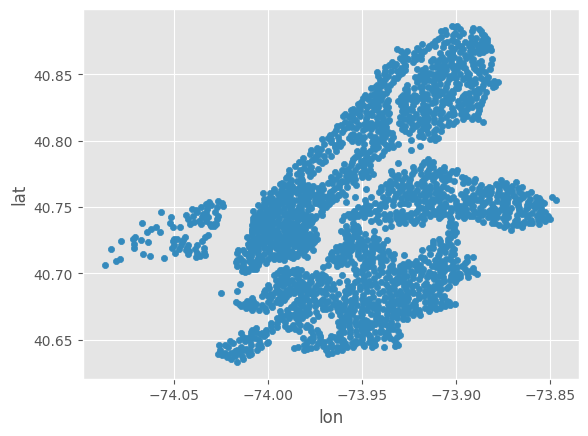

In [24]:
pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].plot.scatter(x='lon', y='lat')

In [18]:
from geodatasets import get_path
import geopandas as gpd

In [47]:
nyc = gpd.read_file(get_path('nybb'))
nybb = nyc.to_crs(32619)

In [56]:
pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].head()

,lon,lat
0,-74.003140,40.723230
1,-74.013181,40.703662
2,-73.989873,40.738661
3,-73.908351,40.819890
4,-74.011678,40.703652


(4510000.0, 4550000.0)

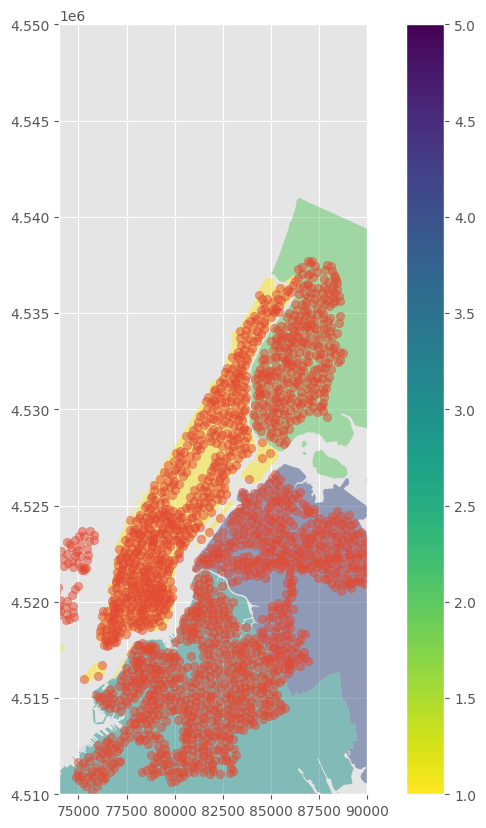

In [91]:
fig,ax = plt.subplots(1,1, figsize=(10,10))
nybb.plot(column='BoroCode', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
#pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']].plot.scatter(x='lon', y='lat', ax=ax)

dd = pd.DataFrame(req.json()['data']['stations'])[['lon', 'lat']]

gdf = gpd.GeoDataFrame(
    dd, geometry=gpd.points_from_xy(dd.lon, dd.lat), crs="EPSG:4326").to_crs(32619)
gdf.plot(ax=ax, alpha= 0.5)
plt.xlim(74000, 90000)
plt.ylim(4.51e6, 4.55e6)